**물류 데이터 분석 요약

- 목표 : 해외에 스포츠 용품을 판매하려는 신규 진입자가 사업 아이템 선정 및 판매 전략 추천
    - 최적의 할인률? 할인의 유효성 확인
    - 스포츠 용품 중에서도 어떤 것이 잘 팔리는가? 의류, 골프 축구 등 특정 스포츠 품목, 
    - 스포츠 용품이 정말 효과적으로 판매 되는가?에 대한 제고 
    - 

In [2]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import pickle
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import roc_auc_score,r2_score,mean_absolute_error,mean_squared_error,accuracy_score,classification_report,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('data_cleaned.csv')

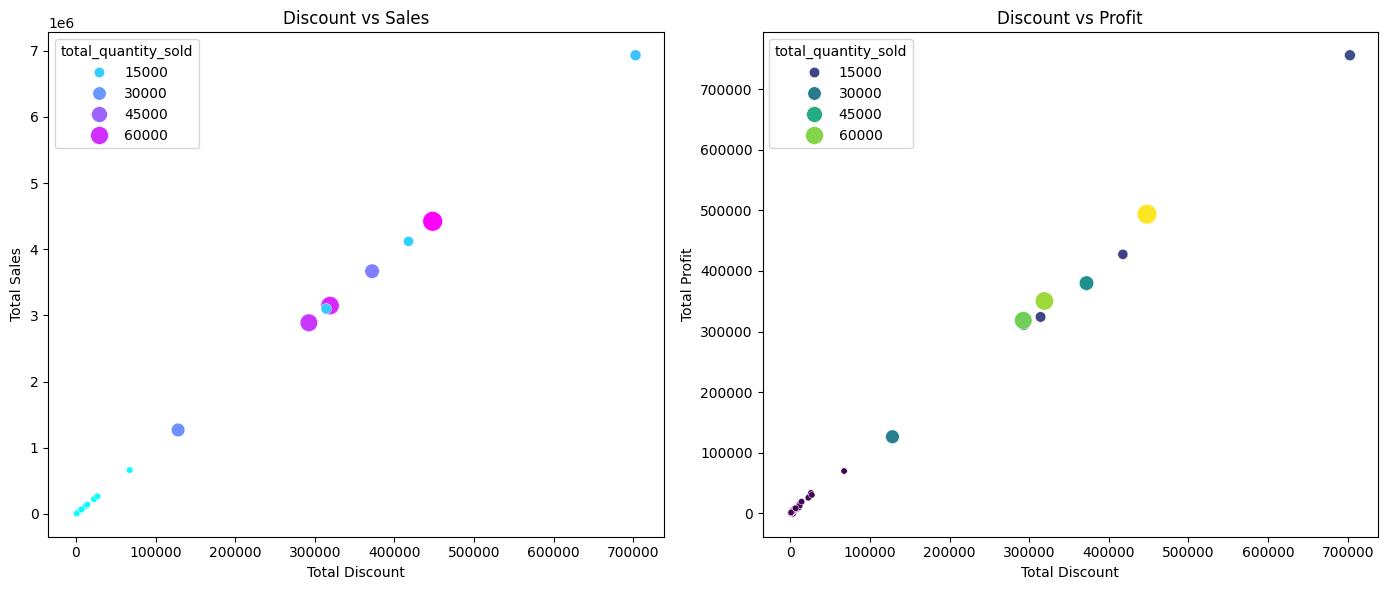

In [5]:
# Grouping data by Product Name to get discount-related metrics
discount_analysis = df.groupby('Product Name').agg(
    total_discount=('Order Item Discount', 'sum'),
    total_sales=('Sales', 'sum'),
    total_quantity_sold=('Order Item Quantity', 'sum'),
    total_profit=('Order Profit Per Order', 'sum')
).reset_index()

# Plotting the relationship between discount and sales, and discount and profit
plt.figure(figsize=(14, 6))

# Subplot 1: Discount vs Sales
plt.subplot(1, 2, 1)
sns.scatterplot(x='total_discount', y='total_sales', data=discount_analysis, hue='total_quantity_sold', palette='cool', size='total_quantity_sold', sizes=(20, 200))
plt.title('Discount vs Sales')
plt.xlabel('Total Discount')
plt.ylabel('Total Sales')

# Subplot 2: Discount vs Profit
plt.subplot(1, 2, 2)
sns.scatterplot(x='total_discount', y='total_profit', data=discount_analysis, hue='total_quantity_sold', palette='viridis', size='total_quantity_sold', sizes=(20, 200))
plt.title('Discount vs Profit')
plt.xlabel('Total Discount')
plt.ylabel('Total Profit')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

해석 

할인량 및 판매수 그리고 총판매액 비교한 것입니다 

대체로 할인량이 높으면 그만큼 판매액도 높습니다.  

판매액이 높은만큼 판매수량도 높은 경향이 있습니다. 하지만 비싼 단품도 있는만큼 꼭 비례하는 것은 아닙니다. 

할인량 및 판매수 그리고 총수익 비교도 비슷한 경향을 보입니다. 

수익은 -도 있어서 어떻게 분포가 나올지 궁금했는데 역시 모든 상품을 합치니 총수익은 양수가 나왔습니다.